In [1]:
%matplotlib inline

import matplotlib
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.dates import DateFormatter
from osgeo import gdal

matplotlib.rc('figure', dpi=150)
plt.rc('axes.formatter', useoffset=False)

transition_cmap = matplotlib.colors.ListedColormap(['blue', 'green', 'orange'])

df = pd.read_csv(
    'data_github/sensitivity_data/tmp.csv',
    usecols=[1,2,3,4,5,6]
)
df = df[df.index <= 1104] # only need for this partial subset
df.insert(0,'datetime',pd.to_datetime(df['riv_datetime'],format='%Y%m%d%H'))
df['surge_h'] = df['surge_h'] * 0.1

df

,datetime,riv_datetime,surge_h,alpha_val,n_coastal,n_hydro,n_trans
0,2018-09-13 20:00:00,2018091320,0.0,0.1,5030457.0,16.0,1.0
1,2018-09-13 20:00:00,2018091320,0.0,0.4,5030457.0,16.0,1.0
2,2018-09-13 20:00:00,2018091320,0.1,0.1,941011.0,3327250.0,762196.0
3,2018-09-13 20:00:00,2018091320,0.1,0.4,941011.0,4008212.0,81234.0
4,2018-09-13 20:00:00,2018091320,0.2,0.1,977884.0,2834298.0,1218275.0
...,...,...,...,...,...,...,...
1100,2018-09-16 08:00:00,2018091608,1.0,0.1,2362840.0,10264599.0,862543.0
1101,2018-09-16 08:00:00,2018091608,1.0,0.4,2362840.0,10550045.0,577097.0
1102,2018-09-16 08:00:00,2018091608,1.1,0.1,10089675.0,10216673.0,645062.0
1103,2018-09-16 08:00:00,2018091608,1.1,0.4,10089675.0,10415788.0,445947.0


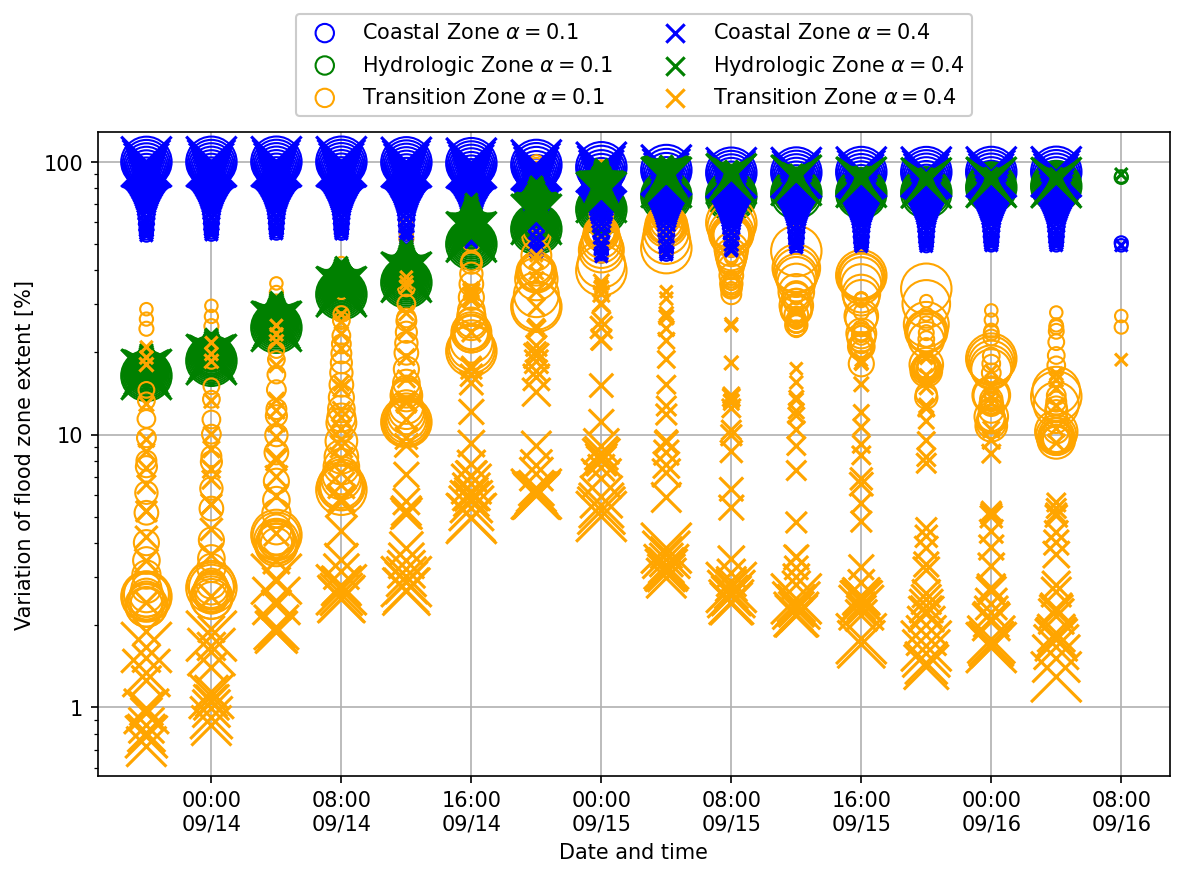

In [2]:
df = df.copy()[df['surge_h'] >= 1.1]

df['n_coastal_norm'] = 100*df['n_coastal']/df['n_coastal'].max()
df['n_hydro_norm'] = 100*df['n_hydro']/df['n_hydro'].max()
df['n_trans_norm'] = 100*df['n_trans']/df['n_trans'].max()

df1 = df[df.alpha_val == 0.1]
df4 = df[df.alpha_val == 0.4]

fig, ax = plt.subplots(
    figsize=(8,6)
)

s_list1 = list(10 * 3.2 ** df1.surge_h)

ax.scatter(
    df1.datetime,
    df1.n_coastal_norm,
    s=s_list1,
    marker='o',
    facecolors='none',
    edgecolors='blue',
    label=r'Coastal Zone $\alpha = 0.1$'
    )

ax.scatter(
    df1.datetime,
    df1.n_hydro_norm,
    s=s_list1,
    marker='o',
    facecolors='none',
    edgecolors='green',
    label=r'Hydrologic Zone $\alpha = 0.1$'
    )

ax.scatter(
    df1.datetime,
    df1.n_trans_norm,
    s=s_list1,
    marker='o',
    facecolors='none',
    edgecolors='orange',
    label=r'Transition Zone $\alpha = 0.1$'
    )

s_list2 = list(10 * 3.2 ** df4.surge_h)

ax.scatter(
    df4.datetime,
    df4.n_coastal_norm,
    s=s_list2,
    marker='x',
    c='blue',
    label=r'Coastal Zone $\alpha = 0.4$'
    )

ax.scatter(
    df4.datetime,
    df4.n_hydro_norm,
    s=s_list2,
    marker='x',
    c='green',
    label=r'Hydrologic Zone $\alpha = 0.4$'
    )

ax.scatter(
    df4.datetime,
    df4.n_trans_norm,
    s=s_list2,
    marker='x',
    c='orange',
    label=r'Transition Zone $\alpha = 0.4$'
    )

ax.set(
    ylabel="Variation of flood zone extent [%]",
    xlabel="Date and time"
)

ax.grid()
ax.set_axisbelow(True)

# ax.legend(
#     loc='center left',
#     bbox_to_anchor=(1, 0.5),
#     framealpha=1,
#     markerscale=0.5
# )

ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.2),
    ncol=2, 
    framealpha=1,
    markerscale=0.5
)

# [1:][::2] indicates every other element starting with second element
plt.xticks(df.datetime.unique()[1:][::2])

date_form = DateFormatter("%H:%M\n%m/%d")
ax.xaxis.set_major_formatter(date_form)

# ax.set_xscale('log')
# ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
# ax.xaxis.get_major_formatter().set_scientific(False)
# ax.xaxis.get_major_formatter().set_useOffset(False)

ax.set_yscale('log')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

fig.tight_layout()

# fig.savefig(
#     'figs/t.png',
#     facecolor='w'
#     )

In [ ]:
# ds = gdal.Open('2018091320_11_01.tif')
# band = ds.GetRasterBand(1)
# compound = band.ReadAsArray()
# ds = None

# plt.imshow(
#     compound,
#     vmin=0,
#     vmax=2,
#     cmap=transition_cmap,
#     interpolation='nearest'
#     )